In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

data = loadmat("./ex6data1.mat")
data

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

In [2]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
from sklearn.svm import SVC,LinearSVC
line_svc = LinearSVC() #一共四个分类器
svc_linear = SVC(kernel="linear")
svc_rbf = SVC(kernel="rbf")
svc_poly = SVC(kernel="poly")
x = data["X"]
y = data["y"]
line_svc.fit(x, y.ravel())
svc_linear.fit(x, y.ravel())
svc_rbf.fit(x, y.ravel())
svc_poly.fit(x, y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
line_svc.score(x, y.ravel())

0.9803921568627451

In [5]:
svc_linear.score(x, y.ravel())

0.9803921568627451

In [6]:
svc_rbf.score(x, y.ravel())

1.0

In [7]:
svc_poly.score(x, y.ravel())

1.0

In [18]:
def plot_svc(svc, x, y, h=0.02, pad=0.25):
    x_min, x_max = x[:, 0].min() - pad, x[:, 0].max() + pad #上限下限
    y_min, y_max = x[:, 1].min() - pad, x[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #矩阵表格
                         np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel表示降维，Z表示预测结果
    Z = Z.reshape(xx.shape) #调整形状
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
#     plt.scatter(x[:,0], x[:,1], s=10, c=y, cmap="rainbow") #这一个c=y这里会因为维度(数)不一样导致下面报错，但下面的两个写法就不会
    plt.scatter(x[:,0], x[:,1], s=10, c=np.squeeze(y), cmap="rainbow")
#     plt.scatter(x[:,0], x[:,1], s=10, cmap="rainbow")
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c="k", linewidths="1")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

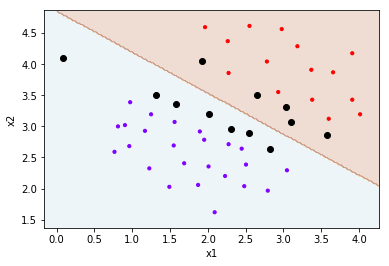

In [19]:
plot_svc(svc_linear, x, y)

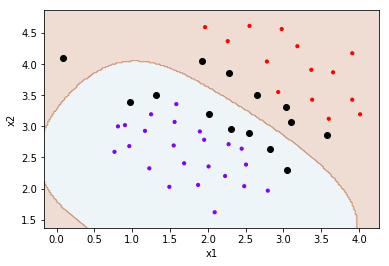

In [20]:
plot_svc(svc_rbf, x, y)

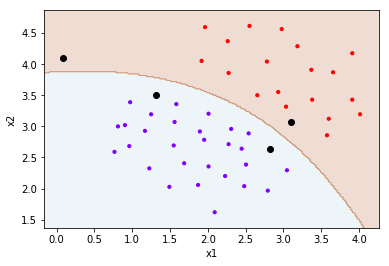

In [21]:
plot_svc(svc_poly, x, y)